<a href="https://colab.research.google.com/github/tianiachan/IdentifyingAirBnBsinSantaClara/blob/main/Data670_Identifying_AirBnBs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#upload necessary csv to google drive 
from google.colab import files
uploaded = files.upload()

Saving calendarMod.csv to calendarMod (1).csv
Saving listingsMod.csv to listingsMod (1).csv
Saving reviewMod.csv to reviewMod (1).csv


In [30]:
# #shortcutting for troubleshooting ML
# #import as dataframe 
import pandas as pd
import io
listings_df = pd.read_csv('/content/listingsMod.csv')
calendar_df = pd.read_csv('/content/calendarMod.csv')
reviews_df = pd.read_csv('/content/reviewMod.csv')

In [7]:
# #import as dataframe 
# import pandas as pd
# import io
# listings_df = pd.read_csv('/content/listings.csv')
# calendar_df = pd.read_csv('/content/calendar.csv')
# reviews_df = pd.read_csv('/content/reviews.csv')

# Step by Step EDA in Python https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

In [8]:
#drop columns not needed for listings
listings_df.columns
listings_df=listings_df.drop(columns=['host_id','host_name','neighbourhood_group','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','availability_365','number_of_reviews_ltm'])

In [9]:
#rename id column to listing id to join later
listings_df.rename(columns={'id':'listing_id'}, inplace=True)

In [11]:
listings_df.head()

,listing_id,name,neighbourhood,latitude,longitude,room_type,calculated_host_listings_count,license
0,2861174.0,Casablanca Master Suite,Palo Alto,37.41710,-122.12669,Private room,1,NaN
1,1364787.0,Iris House Cozy room in dwntn Palo Alto & Stan...,Palo Alto,37.44973,-122.15081,Private room,5,NaN
2,2880487.0,**Premium Executive Condo. with Maid Svcs**,Los Altos,37.37318,-122.10736,Entire home/apt,1,NaN
3,1366049.0,Beautiful Single Family Home,Campbell,37.26901,-121.96325,Private room,1,NaN
4,4952.0,Butterfly Inn near Stanford with weekly cleaning,Palo Alto,37.43932,-122.15741,Private room,5,NaN


In [12]:
#same for reviews
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [13]:
#drop the columns
reviews_df=reviews_df.drop(columns=['reviewer_id'])

In [14]:
reviews_df.head()

,listing_id,id,date,reviewer_name,comments
0,4952,6560,2009-08-02,Diane,Staying with Mei Lin and Ross at the Butterfly...
1,1353178,7471795,2013-09-21,Jesus,I will definitely stay at HackerHome when I go...
2,1353178,10120145,2014-02-01,Jeanne,Rob and Vic = family.\r<br/>Class acts.
3,1353178,11096627,2014-03-20,Debora,"Very nice place, nice people, nice location! I..."
4,1353178,11875945,2014-04-17,Pascal,I had a really good time in the HackerHome. Ev...


In [15]:
#rename column id so it says review id
reviews_df.rename(columns={'id':'review_id'}, inplace=True)

In [16]:
#check that changes happened
reviews_df.head()

,listing_id,review_id,date,reviewer_name,comments
0,4952,6560,2009-08-02,Diane,Staying with Mei Lin and Ross at the Butterfly...
1,1353178,7471795,2013-09-21,Jesus,I will definitely stay at HackerHome when I go...
2,1353178,10120145,2014-02-01,Jeanne,Rob and Vic = family.\r<br/>Class acts.
3,1353178,11096627,2014-03-20,Debora,"Very nice place, nice people, nice location! I..."
4,1353178,11875945,2014-04-17,Pascal,I had a really good time in the HackerHome. Ev...


In [17]:
#do the same for calendar
calendar_df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [18]:
calendar_df=calendar_df.drop(columns=['price','adjusted_price','minimum_nights','maximum_nights'])

In [19]:
#exploratory statistics on each dataset
listings_df.describe()

,listing_id,latitude,longitude,calculated_host_listings_count
count,6.162000e+03,6162.000000,6162.000000,6162.000000
mean,2.086868e+17,37.346771,-121.961575,54.354755
std,3.186442e+17,0.066625,0.111997,130.668417
min,4.952000e+03,36.965600,-122.196520,1.000000
25%,2.599622e+07,37.317750,-122.039510,1.000000
50%,4.625849e+07,37.348895,-121.951896,3.000000
75%,6.028115e+17,37.394208,-121.885593,13.000000
max,7.901690e+17,37.462000,-121.380120,461.000000


In [20]:
##paired with datatype and identification of null values
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      6162 non-null   float64
 1   name                            6161 non-null   object 
 2   neighbourhood                   6162 non-null   object 
 3   latitude                        6162 non-null   float64
 4   longitude                       6162 non-null   float64
 5   room_type                       6162 non-null   object 
 6   calculated_host_listings_count  6162 non-null   int64  
 7   license                         258 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 385.2+ KB


In [21]:
#remove duplicates
listings_df = listings_df.drop_duplicates(subset = ['listing_id'])

In [22]:
#finally check for any duplicates?
listings_df.duplicated().sum()

0

In [ ]:
reviews_df.describe() #no staistical value since the rest are boolean or string

,listing_id,review_id
count,1.966170e+05,1.966170e+05
mean,2.610696e+16,2.208022e+17
std,1.263996e+17,2.991275e+17
min,4.952000e+03,6.560000e+03
25%,1.101710e+07,3.223056e+08
50%,2.215150e+07,6.068444e+08
75%,3.818878e+07,5.363594e+17
max,7.803523e+17,7.907592e+17


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196617 entries, 0 to 196616
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     196617 non-null  int64 
 1   review_id      196617 non-null  int64 
 2   date           196617 non-null  object
 3   reviewer_name  196616 non-null  object
 4   comments       196564 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.5+ MB


In [ ]:
reviews_df.duplicated().sum()

0

In [ ]:
calendar_df.describe()

,listing_id
count,2.249130e+06
mean,2.086868e+17
std,3.186184e+17
min,4.952000e+03
25%,2.598223e+07
50%,4.625849e+07
75%,6.028160e+17
max,7.901690e+17


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249130 entries, 0 to 2249129
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
dtypes: int64(1), object(2)
memory usage: 51.5+ MB


In [ ]:
calendar_df.duplicated().sum()

0

**Beginning of section for own notes - DO NOT USE**

In [ ]:
#concentrate on the text cleaning now
#takenfrom https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/
#lowercaseing the data, need as type str so that it processes as string even though datatype is object
reviews_df['comments'] = reviews_df['comments'].astype('str').apply(str.lower)

In [ ]:
#test dataframe for testing methods before executing on reviews_df
#reviews_test = reviews_df.copy()

In [ ]:
#preview the changes
#reviews_test.head(20)

In [ ]:
#remove the <br/> from the reviews
reviews_df['comments'] = reviews_df['comments'].str.replace('<br/>','')

In [ ]:
#get rid of the \r
reviews_df['comments'] = reviews_df['comments'].str.replace('\r','')

In [ ]:
#remove punctuation
import string
#method
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
#removal from column
reviews_df['comments'] = reviews_df['comments'].astype('str').apply(remove_punctuations)

In [ ]:
#remove numbers
reviews_df['comments'] = reviews_df['comments'].str.replace('\d+', '')

<ipython-input-28-ff7a0831e770>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_df['comments'] = reviews_df['comments'].str.replace('\d+', '')


In [ ]:
#remove extra spaces
reviews_df['comments'] = reviews_df['comments'].str.strip()

In [ ]:
#remove emojis
import re
#method and library needed to remove emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
# actual removal
reviews_df['comments'] = reviews_df['comments'].astype('str').apply(remove_emoji)

In [ ]:
#run this each new run then comment it out
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#remove contractions
#pip install library and the method to remove contractions
import contractions
#empty list for expanded text
def remove_contractions(text):
  return contractions.fix(text)

In [ ]:
#actually remove
reviews_df['comments'] = reviews_df['comments'].astype('str').apply(remove_contractions)

In [41]:
#remove stopwords, tokenize and create a wordcloud with the words that are most frequent.. later
import nltk
nltk.download('all')
import wordcloud
from nltk import sent_tokenize as st
from nltk import word_tokenize as wt
from nltk.probability import FreqDist as fd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#remove stop words and words that are only one character long
#reviews_df['comments'] = reviews_df['comments'].astype('str').apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

reviews_df['comments'] = reviews_df['comments'].astype('str').apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words) and len(word) != 1]))

In [ ]:
#remove where only 1 character long, most likely typo or nonsensical HELP MEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
#reviews_df['comments'] = reviews_df['comments'].astype('str').apply(lambda x: ' '.join([word for word in x.split() if len(word) != 1]))

In [ ]:
##print to csv for use in tableau and SAS Enterprise Miner
reviews_df.to_csv("reviewMod.csv")

In [ ]:
listings_df.to_csv("listingsMod.csv")

In [ ]:
calendar_df.to_csv("calendarMod.csv")

**jk don't use from here**

In [ ]:
reviews_df.comments.isnull().values.any()

True

In [ ]:
#since there are nulls, lets drop them for the word cloud but make copy of dataframe so itdoesnt affect the actual one used for processing
review_copy = reviews_df.copy()

In [ ]:
#drop nulls
review_copy = review_copy.dropna()

In [ ]:
#check the nulls were dropped
review_copy.comments.isnull().values.any()

False

In [ ]:
#get frequency of each word?
#first turn into string
commentStr = ' '.join(review_copy['comments'])


In [ ]:
# https://www.guru99.com/tokenize-words-sentences-nltk.html -- tokenize sentence if wat to see average word per sentence
#how to https://www.geeksforgeeks.org/introduction-to-nltk-tokenization-stemming-lemmatization-pos-tagging/
#then tokenize for sentence (in case) and words
sent_comment = st(commentStr)

In [ ]:
type(sent_comment)

list

In [ ]:
#for words
word_comment = wt(commentStr)

In [ ]:
type(word_comment)

list

In [ ]:
#test the contents
#for i in range(5):
#  print(word_comment[i])

staying
mei
lin
ross
butterfly


In [ ]:
##convert to string for lemmatization
# convert from array of strings to a giant string
wordStr = ' '.join(word_comment)

In [ ]:
#lemmatize to get similiar words together versus stemming which can just cut words shorter Ex: 'play', 'plays', 'played', and 'playing' have 'play' as the lemma. 
from nltk.stem import WordNetLemmatizer
wclemmatizer = WordNetLemmatizer()

wcwordLemmatized = wclemmatizer.lemmatize(wordStr)

In [ ]:
#put back into array so can be iterized for word frequency

lemmatized_array = wcwordLemmatized.split()


In [ ]:
#get frequency
word_freq = fd(lemmatized_array)

In [ ]:
#word_freq

FreqDist({'place': 98569, 'great': 97784, 'stay': 95070, 'clean': 61479, 'nice': 43767, 'location': 43171, 'host': 40182, 'would': 39714, 'house': 36411, 'comfortable': 35997, ...})

In [ ]:
# countOne = 0
# for word in word_freq:
#   if len(word) == 1:
#     countOne += 1
# print(countOne)

23


In [ ]:
word_freq.most_common(30)

[('place', 98569),
 ('great', 97783),
 ('stay', 95070),
 ('clean', 61479),
 ('nice', 43766),
 ('location', 43171),
 ('host', 40182),
 ('would', 39714),
 ('house', 36411),
 ('comfortable', 35997),
 ('room', 30002),
 ('home', 29825),
 ('everything', 27759),
 ('recommend', 26835),
 ('quiet', 25949),
 ('definitely', 24199),
 ('good', 22187),
 ('perfect', 21737),
 ('easy', 21647),
 ('area', 21095),
 ('well', 21069),
 ('really', 19639),
 ('space', 19375),
 ('time', 18349),
 ('beautiful', 18198),
 ('us', 17486),
 ('super', 17394),
 ('close', 16572),
 ('neighborhood', 16458),
 ('also', 15371)]

In [ ]:
#create wordcloud
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# https://www.datacamp.com/tutorial/text-analytics-beginners-nltk
# https://realpython.com/python-keras-text-classification/
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
import numpy as np
import re

**Note, delete( or save seperately for own notes) above text preprocessing  since this would work as a word cloud in python but not needed to process outside of what we will do below for text classification**

In [32]:
reviews_df['listing_id'].nunique()

4763

In [33]:
#rename id column in listings df to listing id so that can merge
listings_df.rename(columns={'id':'listing_id'}, inplace=True)

In [34]:
listings_df.columns

Index(['Unnamed: 0', 'listing_id', 'name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'calculated_host_listings_count', 'license'],
      dtype='object')

In [35]:
reviews_df.columns

Index(['Unnamed: 0', 'listing_id', 'review_id', 'date', 'reviewer_name',
       'comments'],
      dtype='object')

In [ ]:
#merged_df['room_type'].isna().sum()

In [37]:
#join reviews and listings together to get apartment (target variable) and comments ( our data to extract keywords from)
merged_df = listings_df.merge(reviews_df, on = 'listing_id', how = 'inner')

In [38]:
merged_df.shape # listing 6148 review 196617 merged 188499 - inner merged right 196617

(188499, 14)

In [ ]:
#get a sample of 60% of dataframe, random state is like set seed in r
#merged_df60 = merged_df.sample(frac=0.6, random_state = 5)

In [ ]:
#merged_df60.head()

In [ ]:
#merged_df60.shape

In [ ]:
#merged_df60.comments.isnull().values.any()

In [ ]:
#merged_df60.duplicated().sum() #we are good so go back to using the whole dataframe

In [39]:
# define variables containing the data and  target variable
x, y = merged_df.comments, merged_df.room_type

In [ ]:
type(x)

pandas.core.series.Series

In [ ]:
x.hasnans # no nulls?

True

In [ ]:
print (x[:10])

0    mitchs host went way make feel home room peace...
1    best stay personal experience ever march excel...
2    mircha friendly gracious host nice house room ...
3    mircha excellent host really enjoy hospitality...
4    mircha really warm host excellent conversation...
5    beautiful room convenient location mircha grac...
6    wow incredible house phenomenal host browsing ...
7    best room really beautiful spacious nice decor...
8     great location great value like private bathroom
9    stay mirchas place phenomenal mircha wonderful...
Name: comments, dtype: object


In [ ]:
print(len(x))

188499


In [42]:
#need to split and lemmatize
from nltk.stem import WordNetLemmatizer
import re
import numpy as np
lemmatizer = WordNetLemmatizer()
documents = []


#clean and lemmatize to create documents
for sen in range(0, len(x)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(x[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [lemmatizer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [43]:
type(documents)

list

In [44]:
None in documents # no nulls?

False

In [45]:
#convert text to numbers for ML algorithms using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
#each unique word is converted to a feature so when limiting to 1500, that helps get rid of those with a low frequency
# min  df is minimum number of documents containing the feature
vectorizer = CountVectorizer(max_features=1500, min_df=1, max_df = .7, stop_words=stopwords.words('english'))
# vectorizer = CountVectorizer(max_features=1500, min_df=1, stop_words=stopwords.words('english'))
# vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
#apply to x and transform the documents into numeric features using fit transform
x = vectorizer.fit_transform(documents).toarray()

In [46]:
type(x)

numpy.ndarray

In [47]:
x.shape

(188499, 1500)

In [48]:
#find if there are nulls in numpy  array
def findNulls(data):
  return np.count_nonzero(np.isnan(data))

In [49]:
findNulls(x) 

0

In [50]:
#create tfidf from bag of words aka inverse document frequency = log( total # of ducoments/ # of documents containing word)
from sklearn.feature_extraction.text import TfidfTransformer
tdidfconverter = TfidfTransformer()

#now convert
x = tdidfconverter.fit_transform(x).toarray()

In [51]:
#split into training and testing
from sklearn.model_selection import train_test_split
#random state sets the seed and test size is a percentage so this is 20 80 split
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 5)

<Axes: >

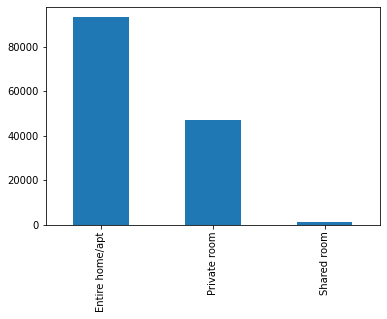

In [52]:
#check to see if target variable is balanced enough
# https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0
y_train.value_counts().plot(kind = 'bar')
#entire home/apt is the most but need to balance to make models more accurate, since data set is huge, delete rows to make more balanced this time

In [62]:
y_train.value_counts()

Entire home/apt    93145
Private room       46971
Shared room         1258
Name: room_type, dtype: int64

In [63]:
y_test.value_counts()

Entire home/apt    30939
Private room       15761
Shared room          425
Name: room_type, dtype: int64

In [61]:
#'delete' to balance the data, there are other methods but those would increase the size of the dataset slowing down the algorithms even more
from imblearn.datasets import make_imbalance
#save in different variables to be able to compare
x_train_1, y_train_1 = make_imbalance(x_train, y_train, sampling_strategy={'Entire home/apt': 1200, 'Private room': 1200, 'Shared room': 1200},random_state=5)
x_test_1, y_test_1 = make_imbalance(x_test, y_test, sampling_strategy={'Entire home/apt': 425, 'Private room': 425, 'Shared room': 425},random_state=5)

In [64]:
y_train_1.value_counts()

Entire home/apt    1200
Private room       1200
Shared room        1200
Name: room_type, dtype: int64

In [65]:
y_test_1.value_counts()

Entire home/apt    425
Private room       425
Shared room        425
Name: room_type, dtype: int64

In [ ]:
findNulls(x_train) # sweet there are none

0

In [ ]:
x_train.shape

(141374, 1500)

In [ ]:
print(x_train)

[[0.15534087 0.         0.         ... 0.         0.         0.        ]
 [0.11807082 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
# first 5 rows
print(x_train[0:5, :])

[[0.15534087 0.         0.         ... 0.         0.         0.        ]
 [0.11807082 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**Random Forest Classifier**

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# https://corporatefinanceinstitute.com/resources/data-science/random-forest/#:~:text=Among%20all%20the%20available%20classification,other%20classes%20in%20the%20data.
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
rfclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 5)
rfclassifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=5)

In [71]:
#libraries for evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
#get predictions from the model
y_pred = rfclassifier.predict(x_test)

In [ ]:
#accuracy
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7473103448275862


In [ ]:
#precision
precision = precision_score (y_test, y_pred, average = "micro")
print(precision)

0.7473103448275862


In [ ]:
#recall
recall = recall_score(y_test, y_pred, average = "micro")
print(recall)

0.7473103448275862


In [ ]:
#f1 score
f1 = f1_score (y_test,y_pred, average = "micro")
print(f1)

0.7473103448275862


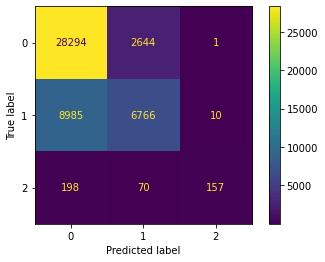

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [68]:
#using balanced variables
rfclassifier_balanced = RandomForestClassifier(n_estimators = 1000, random_state = 5)
rfclassifier_balanced.fit(x_train_1,y_train_1)

RandomForestClassifier(n_estimators=1000, random_state=5)

In [69]:
#evaluate
#get predictions from the model
y_pred_RFCBalanced = rfclassifier_balanced.predict(x_test_1)

In [75]:
# fixing value error target is multiclass butaverage = 'binary'
# https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary
#accuracy
accuracyRFB = accuracy_score(y_test_1,y_pred_RFCBalanced)
#precision
precisionRFB = precision_score (y_test_1, y_pred_RFCBalanced, average = "micro")
#recall
recallRFB = recall_score(y_test_1, y_pred_RFCBalanced, average = "micro")
#f1 score
f1RFB = f1_score (y_test_1,y_pred_RFCBalanced, average = "micro")
print("F1 Score:", f1RFB)
print("Recall:", recallRFB)
print("Precision:",  precisionRFB)
print("Accuracy:", accuracyRFB)

F1 Score: 0.6447058823529411
Recall: 0.6447058823529411
Precision: 0.6447058823529411
Accuracy: 0.6447058823529411


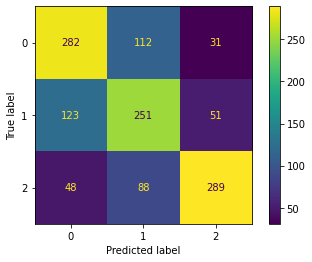

In [73]:
#confusion matrix
cmRFB = confusion_matrix(y_test_1,y_pred_RFCBalanced)
ConfusionMatrixDisplay(confusion_matrix = cmRFB).plot()

**SVM**

In [77]:
from sklearn.svm import SVC

In [ ]:
# https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)

SVC(gamma='auto')

In [ ]:
#evaluate SVM
#get predictions from the model
y_predsvm = clf.predict(x_test)

In [ ]:
#accuracy
accuracysvm = accuracy_score(y_test,y_predsvm)
#precision
precisionsvm = precision_score (y_test, y_predsvm, average = "micro")
#recall
recallsvm = recall_score(y_test, y_predsvm, average = "micro")
#f1 score
f1svm = f1_score (y_test,y_predsvm, average = "micro")
print("F1 Score:", f1svm)
print("Recall:", recallsvm)
print("Precision:",  precisionsvm)
print("Accuracy:", accuracysvm)

F1 Score: 0.6565305039787799
Recall: 0.6565305039787799
Precision: 0.6565305039787799
Accuracy: 0.6565305039787799


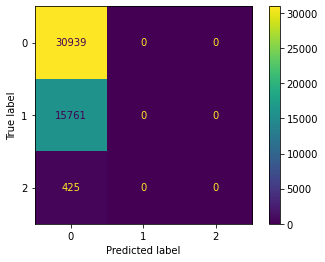

In [ ]:
#confusion matrix
cmsvm = confusion_matrix(y_test,y_predsvm)
ConfusionMatrixDisplay(confusion_matrix = cmsvm).plot()

In [78]:
#compare to balanced SVM
clfB = SVC(gamma='auto')
clfB.fit(x_train_1, y_train_1)

SVC(gamma='auto')

In [79]:
#evaluate SVM
#get predictions from the model
y_predsvmB = clfB.predict(x_test_1)

In [80]:
#accuracy
accuracysvmB = accuracy_score(y_test_1,y_predsvmB)
#precision
precisionsvmB = precision_score (y_test_1, y_predsvmB, average = "micro")
#recall
recallsvmB = recall_score(y_test_1, y_predsvmB, average = "micro")
#f1 score
f1svmB = f1_score (y_test_1,y_predsvmB, average = "micro")
print("F1 Score:", f1svmB)
print("Recall:", recallsvmB)
print("Precision:",  precisionsvmB)
print("Accuracy:", accuracysvmB)

F1 Score: 0.527843137254902
Recall: 0.527843137254902
Precision: 0.527843137254902
Accuracy: 0.527843137254902


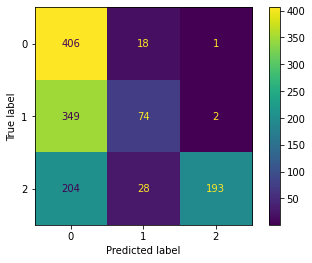

In [81]:
#confusion matrix
cmsvmB = confusion_matrix(y_test_1,y_predsvmB)
ConfusionMatrixDisplay(confusion_matrix = cmsvmB).plot()

CNN Convolutional Neural Network

In [82]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
from sklearn.neural_network import MLPClassifier

In [ ]:
clfCNN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clfCNN.fit(x, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
#evaluate CNN
#get predictions from the model
y_predCNN = clfCNN.predict(x_test)

In [ ]:
#accuracy
accuracyCNN = accuracy_score(y_test,y_predCNN)
#precision
precisionCNN = precision_score (y_test, y_predCNN, average = "micro")
#recall
recallCNN = recall_score(y_test, y_predCNN, average = "micro")
#f1 score
f1CNN = f1_score (y_test,y_predCNN, average = "micro")
print("F1 Score:", f1CNN)
print("Recall:", recallCNN)
print("Precision:",  precisionCNN)
print("Accuracy:", accuracyCNN)

F1 Score: 0.6565305039787799
Recall: 0.6565305039787799
Precision: 0.6565305039787799
Accuracy: 0.6565305039787799


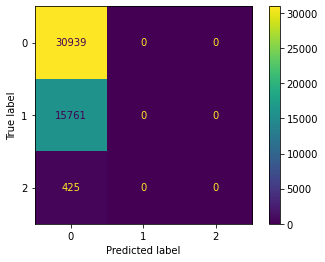

In [ ]:
#confusion matrix
cmCNN = confusion_matrix(y_test,y_predCNN)
ConfusionMatrixDisplay(confusion_matrix = cmCNN).plot()

In [ ]:
clfCNNB = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clfCNNB.fit(x, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
#evaluate CNN balanced
#get predictions from the model
y_predCNNB = clfCNNB.predict(x_test_1)

In [ ]:
#accuracy
accuracyCNN = accuracy_score(y_test,y_predCNN)
#precision
precisionCNN = precision_score (y_test, y_predCNN, average = "micro")
#recall
recallCNN = recall_score(y_test, y_predCNN, average = "micro")
#f1 score
f1CNN = f1_score (y_test,y_predCNN, average = "micro")
print("F1 Score:", f1CNN)
print("Recall:", recallCNN)
print("Precision:",  precisionCNN)
print("Accuracy:", accuracyCNN)